<a href="https://colab.research.google.com/github/rodrigoromanguzman/Actividades_Aprendizaje-/blob/main/semana8/regresiones_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>Ejercicio 1</h3>
<p>Costo en la industria de manufactura.</p>

<ul>
<li>Divide los datos del costo de manufactura. Utiliza la duncion train_test_split</li>
<ul>

In [77]:
#Importamos la base de datos y las librerias que vamos a utilizar
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')

#Revisamos la correlacion entre variables porque nos da un indice de linearidad y 
#de que tan funcional sera usar regression lineal con los datos
print('Correlacion entre variables')
print(df.corr())

#Separamos la variable objetivo de la caracteristica que usaremos para predecir
x = df['Number of Units']
y = df['Manufacturing Cost']

#El modelo de regresion lineal de Scikit-Learn's espera un input de 2D y de momento nuestros datos
#tienen una forma de 1D. Por lo que tenemos que reformar nuestros datos.
print('Forma de datos antes')
print('X: ',x.values.shape,'Y: ',y.values.shape)

#reformar
X = x.values.reshape(-1, 1)
Y = y.values.reshape(-1, 1)

print('Forma de datos despues')
print('X: ',X.shape,'Y_train: ',Y.shape)


#Por default obtenemos un 25% de datos reservados para testing
#Dado que el proceso de seleccion de datos es random, para evitar diferencias cada vez que 
#ejecutemos el algoritmo. Utilizaremos una constante SEED = 42
SEED = 42
(X_train, X_test, y_train, y_test) = train_test_split(X, Y,random_state=SEED)


Correlacion entre variables
                    Number of Units  Manufacturing Cost
Number of Units            1.000000           -0.760905
Manufacturing Cost        -0.760905            1.000000
Forma de datos antes
X:  (1000,) Y:  (1000,)
Forma de datos despues
X:  (1000, 1) Y_train:  (1000, 1)


<ul>
<li>Regression Lineal</li>
<ul>

In [78]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#Entrenamos nuestro modelo en los datos de entrenamiento
regressor.fit(X_train, y_train)

print('Interseccion: ',regressor.intercept_)
print('Coeficiente: ',regressor.coef_)

#Revisemos las predicciones en los datos de prueba
y_pred = regressor.predict(X_test)

#Comparamos las predicciones con los valores reales
df_preds = pd.DataFrame({'Real': y_test.squeeze(), 'Prediccion': y_pred.squeeze()})
print(df_preds)



Interseccion:  [67.88519414]
Coeficiente:  [[-6.22507903]]
          Real  Prediccion
0    38.634483   39.755998
1    33.233497   34.987583
2    34.550609   34.937744
3    34.982985   36.569338
4    43.090662   41.850114
..         ...         ...
245  57.942993   50.041007
246  37.715435   41.573461
247  46.461065   51.676315
248  50.402065   51.241571
249  40.800063   44.616595

[250 rows x 2 columns]


<p>Errores y R^2</p>

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 4.73
Mean squared error: 39.90
Root mean squared error: 6.32
R^2: 0.58


<p>Graficamos los resultados</p>

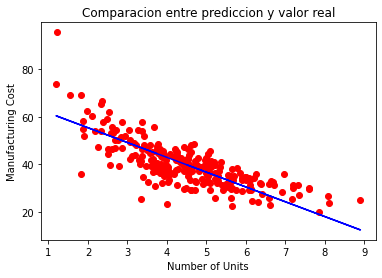

In [80]:
import matplotlib.pyplot as plot

plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_test, y_pred, color = 'blue')
plot.title('Comparacion entre prediccion y valor real')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()

<h3>Regresion Polinomial</h3>

In [81]:
from sklearn.preprocessing import PolynomialFeatures


#Ejemplo con grado 2
poly_reg=PolynomialFeatures(degree=2)

#Entrenamos el Modelo
X_poly=poly_reg.fit_transform(X_train)


poly_reg.fit(X_poly,y_train)

poly_reg_model = LinearRegression()

poly_reg_model.fit(X_poly, y_train)

#Creamos la base polinomial de los datos de prueba
poly_test = poly_reg.fit_transform(X_test)

y_poly_pred = np.ravel(poly_reg_model.predict(poly_test))
print(y_poly_pred)

[37.51186406 33.37100093 33.33561018 34.57900036 39.80248666 34.34302715
 35.12780897 37.73598268 31.26389176 49.63099553 32.1822282  54.42854339
 34.96659631 29.5425703  29.75508236 30.57309912 43.46973132 30.82369286
 32.97466436 42.15490615 37.00009786 48.03595941 40.68506452 37.41767523
 46.50662299 45.43284123 52.40752569 29.9433378  30.53903453 29.65688088
 41.32765463 49.5688114  35.2205882  38.05799261 40.71856994 46.91759955
 34.23268725 36.27182419 30.54715366 57.17410142 41.85445282 52.64923261
 42.37777863 29.54749107 42.94794314 43.61293676 30.03286793 35.83224952
 39.31851118 31.80232426 36.63043277 30.89422822 44.08210194 36.41176362
 64.05770583 63.28979232 35.38562737 67.80141814 46.14797412 32.02685422
 43.06575465 57.55177792 37.12709472 46.5329593  35.75385904 34.17960644
 34.56100496 31.1222925  54.83617316 37.10604247 51.80206217 38.09406179
 36.18729229 33.29146341 43.15448389 43.19512862 34.68205779 60.32672305
 36.19459345 42.56907924 34.33669611 55.38125042 43

In [87]:
mae = mean_absolute_error(y_test, y_poly_pred)
mse = mean_squared_error(y_test, y_poly_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_poly_pred)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
print(f'R^2: {r2:.2f}')

Mean absolute error: 4.51
Mean squared error: 35.17
Root mean squared error: 5.93
R^2: 0.63


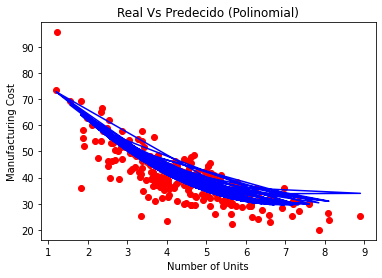

In [86]:
plot.scatter(X_test, y_test, color = 'red')
plot.plot(X_test, y_poly_pred, color = 'blue')
plot.title('Real Vs Predecido (Polinomial)')
plot.xlabel('Number of Units')
plot.ylabel('Manufacturing Cost')
plot.show()